## Exercise 1 – Web API

In [1]:
%pylab inline
import requests
import matplotlib.pyplot as plt
import time

Populating the interactive namespace from numpy and matplotlib


## 1) one month of historical weather data

In [2]:
# timestamps for date from 2018-09-19 to 2018-10-18 (30 days) in unix time
time_list = [1539846000, 1539759600, 1539673200, 1539586800, 1539500400, 1539414000,
             1539327600, 1539241200, 1539154800, 1539068400, 1538982000, 1538895600,
             1538809200, 1538722800, 1538636400, 1538550000, 1538463600, 1538377200,
             1538290800, 1538204400, 1538118000, 1538031600, 1537945200, 1537858800,
             1537772400, 1537686000, 1537599600, 1537513200, 1537426800, 1537340400]

# to record longitude and latitude of 5 distinct locations
# for latitude: positive is north, negative is south
# for longitude: positive is east, negative is west
sf = '37.8267,-122.4233' # san francisco
sh = '37.8267,121.4737' # shanghai
pr = '48.8566,2.3522' # paris
md = '40.4168,3.7038' # madrid
sy = '-33.8688,151.2093' # sydney

"""
this function takes a string containing longitude and latitude of a location and returns a
list with its temperature (avg temperature in a day) for 30 days
"""
def getTemp(latNlong):
    temp = [] # a list to restore temperatures
    for i in time_list:
        # request api using specific key
        r = requests.get('https://api.darksky.net/forecast/96173a4dc9293d1c839679e20c1d2b17/'
                         + latNlong + ',' + str(i) + '?exclude=currently,flags')
        result = r.json()
        data = result['daily']['data'][0]
        # calculate average temp, rounded to two decimals
        temp.append(round((data['temperatureLow']+data['temperatureHigh'])/2,2))
    return temp

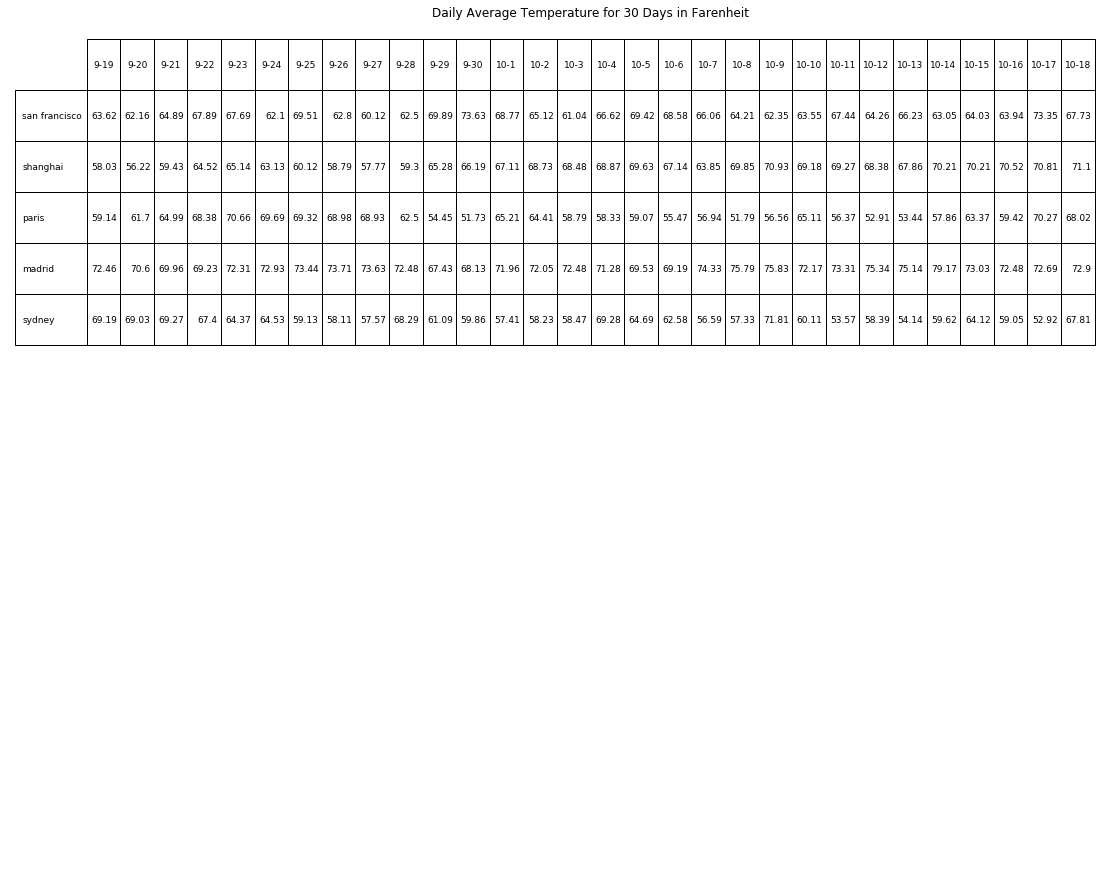

In [3]:
# column labels to indicate specific date corresponding to the unix time
columns = ["9-19","9-20","9-21","9-22","9-23", "9-24",
           "9-25","9-26","9-27","9-28","9-29", "9-30",
           "10-1","10-2","10-3","10-4","10-5", "10-6",
           "10-7","10-8","10-9","10-10","10-11", "10-12",
           "10-13","10-14","10-15","10-16","10-17", "10-18"]
# row labels to display city names
rows = ["san francisco", 'shanghai', 'paris', 'madrid', 'sydney']
# data list with temperature info
data = [getTemp(i) for i in [sf,sh,pr,md,sy]]

fig = plt.figure(1)
fig.subplots_adjust(left=0.2,top=0.8, wspace=1)

#Table - Main table
ax = plt.subplot2grid((4,3), (0,0), colspan=8, rowspan=8)
ax.table(cellText=data, rowLabels=rows,
         colLabels=columns, loc="upper center")

ax.axis("off")
plt.title('Daily Average Temperature for 30 Days in Farenheit') # assign a table name
fig.set_size_inches(w=20, h=17)
plt.show() # display the summary table

## 2) data summary table

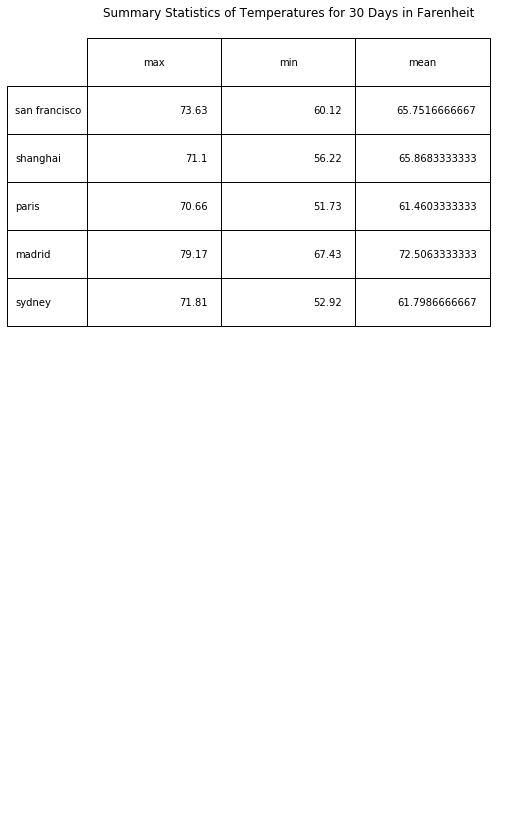

In [4]:
# calculate max, min, mean for each location
sanfrancisco = getTemp(sf)
sf_sum = [max(sanfrancisco), min(sanfrancisco),
          sum(sanfrancisco)/float(30)]
shanghai = getTemp(sh)
sh_sum = [max(shanghai), min(shanghai),
          sum(shanghai)/float(30)]
paris = getTemp(pr)
pr_sum = [max(paris), min(paris),
          sum(paris)/float(30)]
madrid = getTemp(md)
md_sum = [max(madrid), min(madrid),
          sum(madrid)/float(30)]
sydney = getTemp(sy)
sy_sum = [max(sydney), min(sydney),
          sum(sydney)/float(30)]

# column labels for categories of summary statistics
columns = ["max", "min", "mean"]
# row labels to display city names
rows = ["san francisco", 'shanghai', 'paris', 'madrid', 'sydney']
# data list with temperature info
data = [sf_sum, sh_sum, pr_sum, md_sum, sy_sum]

fig = plt.figure(1)
fig.subplots_adjust(left=0.2,top=0.8, wspace=1)

#Table - Main table
ax = plt.subplot2grid((4,3), (0,0), colspan=4, rowspan=6)
ax.table(cellText=data, rowLabels=rows,
         colLabels=columns, loc="upper center")

ax.axis("off")
plt.title('Summary Statistics of Temperatures for 30 Days in Farenheit') # assign a table name
fig.set_size_inches(w=8, h=16)
plt.show() # display the summary table

## 3) comparison graph

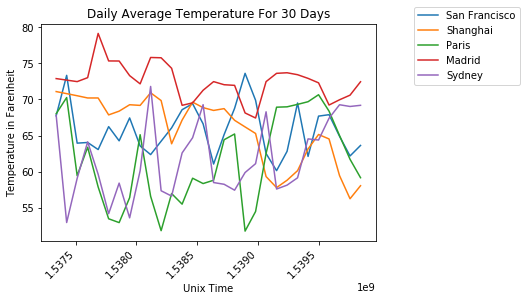

In [6]:
# plot temperatures for 5 cities respectively
fig = plt.figure() # the first figure

plt.plot(time_list, sanfrancisco, label='San Francisco')
plt.plot(time_list, shanghai, label='Shanghai')
plt.plot(time_list, paris, label='Paris')
plt.plot(time_list, madrid, label='Madrid')
plt.plot(time_list, sydney, label='Sydney')

ax = plt.gca()
# setting the anchor of the legend
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

plt.title('Daily Average Temperature For 30 Days')
# x-axis represents time in unix form, number of seconds since 01/01/1970
# it is placed in scientific format
plt.xlabel('Unix Time')
plt.ylabel('Temperature in Farenheit')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show() # display 5 lines plotted

## Exercise 2 – Web Scraping/Crawling

In [7]:
%pylab inline
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#### sequential scrape

In [8]:
def seq_scrape():
    # url to scrape information from
    url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
    response = requests.get(url)
    html = response.content.decode('ascii')
    soup = BeautifulSoup(html, "lxml")
    
    # for extracting last names
    last_name_td_list = soup.find_all('td', attrs = {"data-th": "Last Name"})
    # for extracting first names
    first_name_td_list = soup.find_all('td', attrs = {"data-th": "First Name"})
    # for extracting ages
    age_td_list = soup.find_all('td', attrs = {"data-th": "Age"})
    # for extracting redirected web address
    link_list = soup.find_all('a', attrs = {"class": "_lookup btn btn-primary"})
    base = "https://report.boonecountymo.org/mrcjava/servlet/"
    
    crime_list = [] # to store all info about arrested
    for i in range(len(last_name_td_list)):
        # each element in crime_list is a list of detainee information
        crime_list.append([last_name_td_list[i].string,
                         first_name_td_list[i].string,
                         age_td_list[i].string])
    
    for i in range(len(link_list)):
        # get the url for each person's detailed information
        url_address = base + link_list[i].get('href')
        resp = requests.get(url_address)
        url_html = resp.content.decode('ascii')
        sp = BeautifulSoup(url_html, "lxml")
        caseList = sp.find_all('td', attrs = {"data-th": "CASE #"})
        # count the total number of cases for one person and add it to the case number list
        crime_list[i].append(len(caseList)) 
        total = 0 # to count the total sum of bail for each arrested
        bailList = sp.find_all('td', attrs = {"data-th": "BAIL"})
        # loop through all bails for this person
        for j in range(len(bailList)):
            if (str(bailList[j].string).strip()!=""):
                # delete comma for numerical purpose
                bailStr = bailList[j].string.replace(',','')
                # convert string to a float so we can add up numbers
                total += float(bailStr)
            else: # if there is a comma in the string
                total += 0
        crime_list[i].append(total)
        
    return crime_list
        

#### threading scrape

In [9]:
import threading
from threading import Thread

In [10]:
def thre_scrape():
    # url to scrape information from
    url = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
    response = requests.get(url)
    html = response.content.decode('ascii')
    soup = BeautifulSoup(html, "lxml")
    
    detainees = [] # to store information about detainees
    base = "https://report.boonecountymo.org/mrcjava/servlet/"
    
    def getInfo(number):
        info_list = []
        # get this person's last name
        info_list.append(soup.find_all('td', attrs = {"data-th": "Last Name"})[number].string)
        # get this person's first name
        info_list.append(soup.find_all('td', attrs = {"data-th": "First Name"})[number].string)
        # get this person's age
        info_list.append(soup.find_all('td', attrs = {"data-th": "Age"})[number].string)
        
        # get the url for each person's detailed information
        url_address = base+soup.find_all('a', attrs = {"class": "_lookup btn btn-primary"})[number].get('href')
        resp = requests.get(url_address)
        url_html = resp.content.decode('ascii')
        sp = BeautifulSoup(url_html, "lxml")
        # find all instances of CASE
        caseList = sp.find_all('td', attrs = {"data-th": "CASE #"})
        # count the total number of cases for this person and add it to the information list
        info_list.append(len(caseList)) 
        total = 0 # to count the total sum of bail for each arrested
        # find all instances of BAIL
        bailList = sp.find_all('td', attrs = {"data-th": "BAIL"})
        # loop through all bails for this person
        for j in range(len(bailList)):
            if (str(bailList[j].string).strip()!=""):
                # delete comma for numerical purpose
                bailStr = bailList[j].string.replace(',','')
                # convert string to a float so we can add up numbers
                total += float(bailStr)
            else: # if there is a comma in the string
                total += 0
        info_list.append(total)
        detainees.append(info_list)
    
    threadlist = [] # list to store threads
    Nums = 50 # number of threads to create equal to number of detainees
    
    for i in range(Nums):
        t = Thread(target=getInfo,args=(i,))
        t.start() # start thread
        threadlist.append(t)

    for t in threadlist:
        t.join()
        
    return detainees # return a list of detainees with their respective information

### summary table

#### the table takes a bit time to run and show

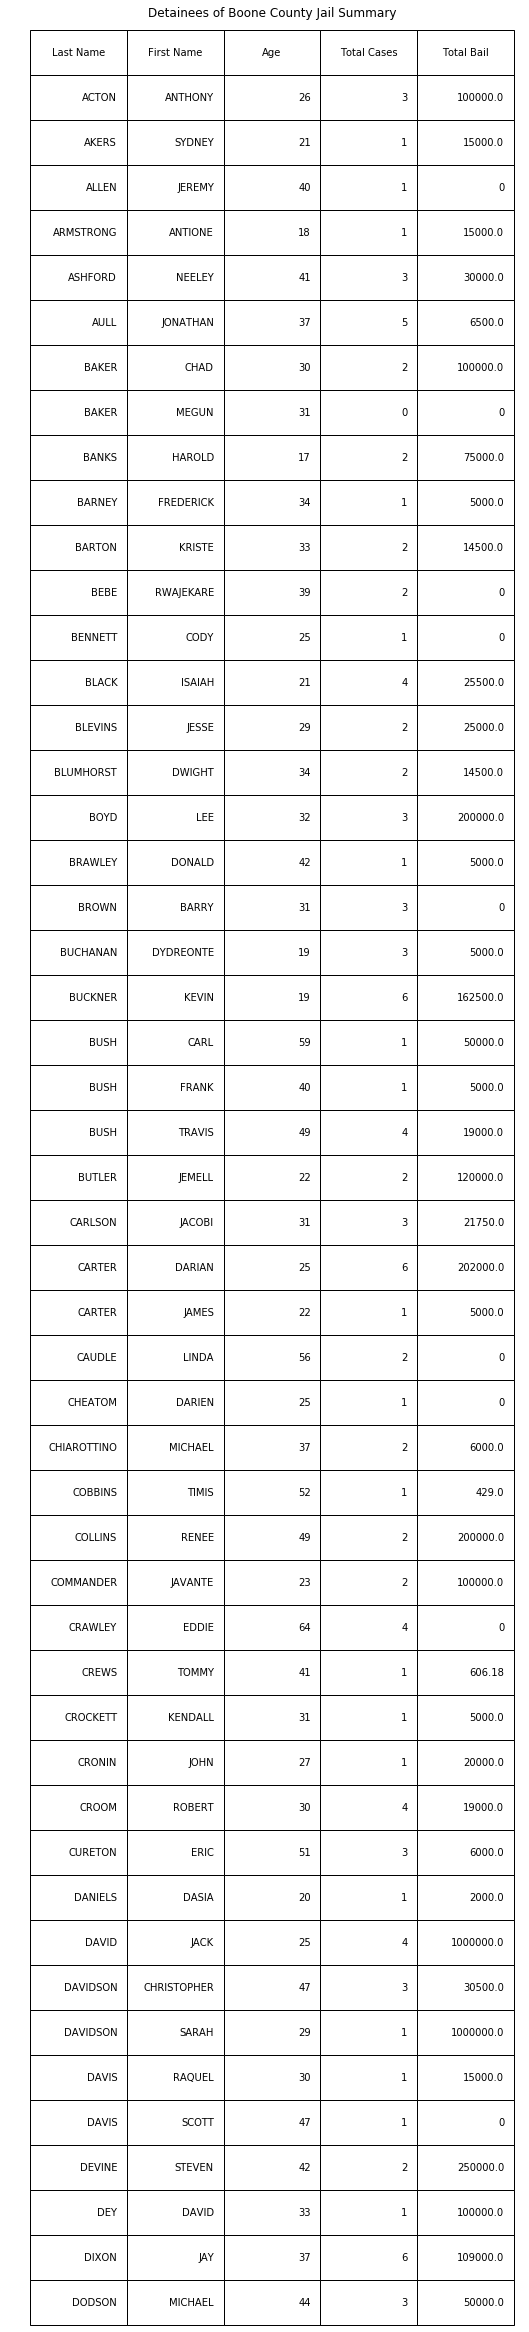

In [11]:
columns = ["Last Name","First Name","Age","Total Cases","Total Bail"] # column names

data = seq_scrape() # data list with detainee info

fig = plt.figure(1)
fig.subplots_adjust(left=0.2,top=0.8, wspace=1)

#Table - Main table
ax = plt.subplot2grid((4,3), (0,0), colspan=2, rowspan=2)
ax.table(cellText=data,
         colLabels=columns, loc="upper center")

ax.axis("off")
plt.title('Detainees of Boone County Jail Summary') # assign a table name
fig.set_size_inches(w=16, h=15)
plt.show() # display the summary table

### comparison between two scrape methods
#### the results takes a bit time to run

In [12]:
import timeit
print("execution time for sequential scraping is:")
print(timeit.timeit(lambda: seq_scrape(), number=1))
print("execution time for threading scraping is:")
print(timeit.timeit(lambda: thre_scrape(), number=1))

execution time for sequential scraping is:
41.127426798979286
execution time for threading scraping is:
12.319577926013153


### crime types

In [13]:
# url to scrape information from
link = 'http://www.showmeboone.com/sheriff/JailResidents/JailResidents.asp'
respo = requests.get(link)
link_html = respo.content.decode('ascii')
sp = BeautifulSoup(link_html, "lxml")
# find all secondary links for each detainee    
linkList = sp.find_all('a', attrs = {"class": "_lookup btn btn-primary"})
base = "https://report.boonecountymo.org/mrcjava/servlet/" # base link of secondary links
charges = [] # to store categories of charges

for i in range(len(linkList)):
    # get the url for each person's detailed information
    url_address = base + linkList[i].get('href')
    resp = requests.get(url_address)
    url_html = resp.content.decode('ascii')
    sop = BeautifulSoup(url_html, "lxml")
    # find all instances of CHARGE DESCRIPTION
    crimeList = sop.find_all('td', attrs = {"data-th": "CHARGE DESCRIPTION"})
    for j in range(len(crimeList)):
        charges.append(crimeList[j].string) # add to names of charges
        
crime = dict((c,0) for c in tuple(charges)) # each charge type is unique

In [14]:
# count the number of charges for each type and update the result in dictionary
for i in range(len(linkList)):
    # get the url for each person's detailed information
    url_address = base + linkList[i].get('href')
    resp = requests.get(url_address)
    url_html = resp.content.decode('ascii')
    sop = BeautifulSoup(url_html, "lxml")
    # find all instances of CHARGE DESCRIPTION
    crimeList = sop.find_all('td', attrs = {"data-th": "CHARGE DESCRIPTION"})
    for j in range(len(crimeList)):
        crime[crimeList[j].string] += 1 # count as one occurence of this crime type

In [16]:
# sort crimes by number of occurences
key=lambda crime_type: crime[crime_type]
crime_sort = sorted(crime,key=key,reverse=True)
print(crime_sort) # sorted list of crime types by number of occurence descending

['FAILURE TO APPEAR', 'POSSESS CONTROL SUBS', 'OUT/COUNTY WARRANT', 'ARMED CRIMINAL ACTIO', 'P&P VIOLATION', 'ROBBERY - 1ST DEGREE', 'FAILURE TO FOLLOW JU', 'COMMIT', 'PROBATION VIOLATION', 'ASLT 1ST-SER PHY INJ', 'ASSAULT 1ST DEG', 'UUW - EXHIBIT', 'WRIT', 'BURGLARY 1ST DEGREE', 'DELIVER CONTROL SUBS', 'UNLAW USE OF WPN S9', 'KIDNAP-FACIL FEL/INJ', 'TAMPERING WITH MOTOR', 'ASSAULT - 2ND - D', 'RESISTING/INTERFERIN', 'FEDERAL HOLD', 'TAMPERING WITH ELECT', 'DOMESTIC ASSLT 1ST D', 'DEPARTMENT OF CORR H', 'REC STOLEN PROPERTY', 'VIOL ORDER PROTECTIO', 'DOMESTIC ASSAULT - 2', 'DWI DEATH NOT PASSEN', 'NO VEH/TRL REGISTRAT', 'OWNR OP MV W/O MAI 1', 'BOND REVOCATION', 'FORGERY', 'UUW POSS CONT SUB', 'TAMP PHYS EVIDENCE', 'LEAVING SCENE OF ACC', 'RAPE OR ATTEMPTED RA', 'US MARSHAL HOLD', 'BURGLARY 2ND DEGREE', 'STEALING', 'ROBBERY 1ST', 'DWI - HABITUAL', 'DUR/DUS', 'SEX TRAFF 2ND U18', 'END CHD WELF SEX CON', 'ASSAULT - 2ND S.V. B', 'STEALING - MOTOR VEH', 'STEALING - MISD A', 'MURDER 2ND DEG

### a plot showing the top 10 crime types

In [17]:
# a list storing top 10 charge types based on charge description and their occurences
# assumption: if charge description is same, then the crime type is same
infomation = [[crime_sort[i], crime[crime_sort[i]]] for i in range(10)]
print(infomation)

[['FAILURE TO APPEAR', 16], ['POSSESS CONTROL SUBS', 7], ['OUT/COUNTY WARRANT', 7], ['ARMED CRIMINAL ACTIO', 7], ['P&P VIOLATION', 6], ['ROBBERY - 1ST DEGREE', 5], ['FAILURE TO FOLLOW JU', 4], ['COMMIT', 4], ['PROBATION VIOLATION', 3], ['ASLT 1ST-SER PHY INJ', 3]]


In [18]:
# the following two lines summarize the total number of occurences of all crime types
occurence = [crime[crime_sort[i]] for i in range(len(crime_sort))]
summation = sum(occurence)

# a list storing top 10 charge types and their percentage of occurence
data_list = [[crime_sort[i], crime[crime_sort[i]]/summation] for i in range(10)]

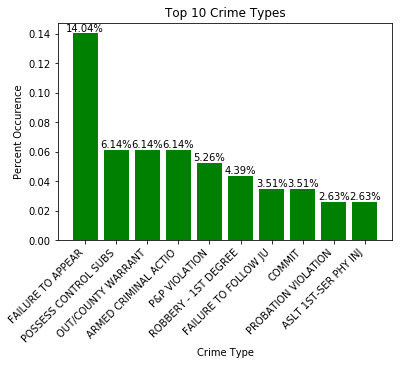

In [19]:
# get names and percent occurences of top 10 crimes and stored in two lists respectively
x = [data_list[i][0] for i in range(10)]
y = [data_list[i][1] for i in range(10)]

x_pos = [i for i, _ in enumerate(x)]

label_bar = plt.bar(x_pos, y, color='green')

# Add percent of occurence above the bar graph (original values are rounded two two decimals)
for rect in label_bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,
             '{}%'.format(float("{0:.2f}".format(height*100))),
             ha='center', va='bottom')    
# add labels for axes and title    
plt.xlabel("Crime Type")
plt.ylabel("Percent Occurence")
plt.title("Top 10 Crime Types")

plt.xticks(x_pos, x)
# display x labels in a more readable way
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show() # display the bar plot